In [1]:
import pandas as pd

In [2]:
data=pd.read_excel("project amazon_sales_data 2025(AutoRecovered).xlsx")
data

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,2025-10-03 00:00:00,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,2025-05-03 00:00:00,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,2025-08-03 00:00:00,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [3]:
data.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

In [4]:
data.dtypes

Order ID             object
Date                 object
Product              object
Category             object
Price                 int64
Quantity              int64
Total Sales           int64
Customer Name        object
Customer Location    object
Payment Method       object
Status               object
dtype: object

In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='mixed', dayfirst=False)
data.dtypes

Order ID                     object
Date                 datetime64[ns]
Product                      object
Category                     object
Price                         int64
Quantity                      int64
Total Sales                   int64
Customer Name                object
Customer Location            object
Payment Method               object
Status                       object
dtype: object

In [6]:
data

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,2025-10-03,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,2025-03-17,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,2025-03-30,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,2025-05-03,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,2025-08-03,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [7]:
data.duplicated().sum()

0

In [8]:
# 1. What is the total number of orders placed?
data['Order ID'].nunique() 

250

In [9]:
# 2. Which products have the highest and lowest total sales?
total_sales = data.groupby("Product")['Total Sales'].sum().sort_values(ascending=False)
total_sales

Product
Refrigerator       78000
Laptop             58400
Smartphone         48500
Washing Machine    27000
Smartwatch         15750
Headphones          7300
Running Shoes       4320
Jeans               2480
T-Shirt             1060
Book                1035
Name: Total Sales, dtype: int64

In [10]:
highest_sales = total_sales.max()  # Highest total sales value
highest_sales

78000

In [11]:
lowest_sales = total_sales.min()  # Lowest total sales value
lowest_sales

1035

In [12]:
3. How many orders were completed, cancelled, or pending?


Object `pending` not found.


In [13]:
# 3. How many orders were completed, cancelled, or pending?
data['Status'].value_counts()

Status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64

In [14]:
# 4. What are the top 5 locations by number of orders?
data.groupby('Customer Location').size().head(5)

Customer Location
Boston     26
Chicago    22
Dallas     29
Denver     26
Houston    32
dtype: int64

In [15]:
data["Customer Location"].value_counts().head(5)

Customer Location
Houston     32
Miami       31
Dallas      29
New York    26
Denver      26
Name: count, dtype: int64

In [16]:
#5. Which category generated the most revenue?
Category_Totalrevenue=data.groupby("Category")["Total Sales"].sum()
Category_Totalrevenue

Category
Books                1035
Clothing             3540
Electronics        129950
Footwear             4320
Home Appliances    105000
Name: Total Sales, dtype: int64

In [17]:
Category_Totalrevenue.idxmax()

'Electronics'

In [18]:
# 6. Create a bar chart of total sales by product.
import matplotlib.pyplot as plt

<Axes: xlabel='Product'>

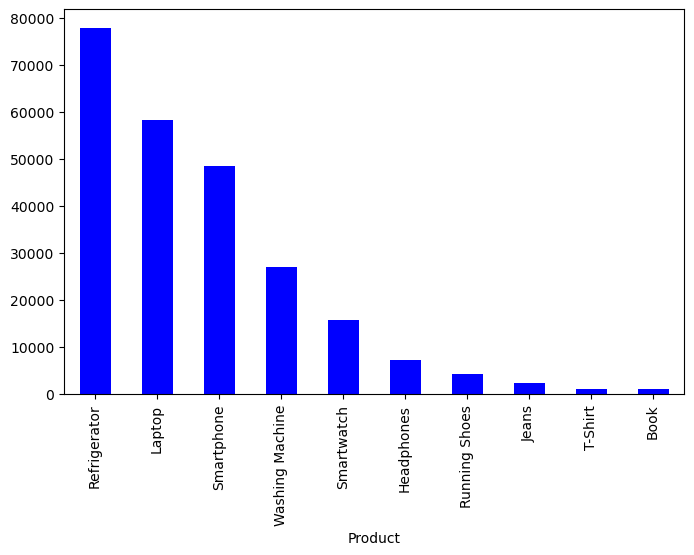

In [19]:
total_sales.plot(kind="bar",color="blue",figsize=(8,5))

In [20]:
# 7. Make a pie chart showing order distribution by payment method.
Totalorder_paymentmethod= data["Payment Method"].value_counts()
Totalorder_paymentmethod

Payment Method
PayPal         60
Credit Card    54
Debit Card     53
Gift Card      42
Amazon Pay     41
Name: count, dtype: int64

<Axes: ylabel='count'>

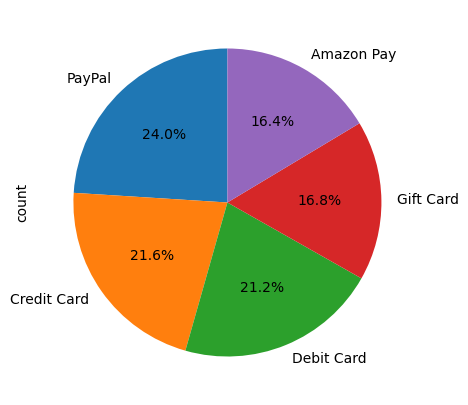

In [21]:
Totalorder_paymentmethod.plot(kind="pie",figsize=(8,5),autopct="%1.1f%%",startangle=90)

In [22]:
#8. Make a Line chart showing the Total sales by date
Topsales_bydate=data.groupby("Date")["Total Sales"].sum().head(10).sort_values(ascending=False)
Topsales_bydate

Date
2025-02-16    9540
2025-02-13    4860
2025-02-03    4575
2025-02-02    3600
2025-02-04    3100
2025-01-03    1800
2025-02-14    1015
2025-02-17    1005
2025-02-15     520
2025-01-04     320
Name: Total Sales, dtype: int64

<Axes: xlabel='Date'>

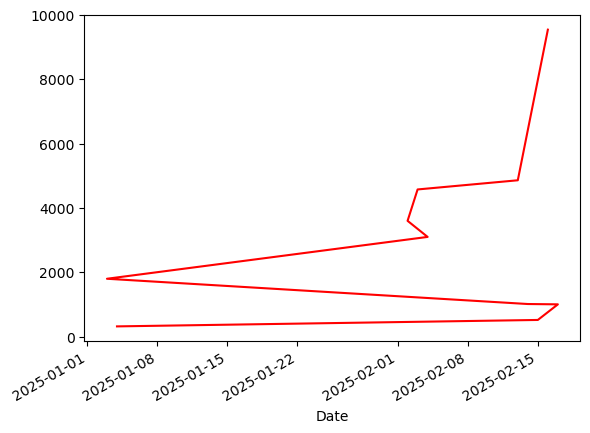

In [23]:
Topsales_bydate.plot(kind="line",color="red")

In [24]:
# 9. Compare average sales per product using a horizontal bar chart.
avg_sales= data.groupby("Product")["Total Sales"].mean().sort_values(ascending=False)
avg_sales

Product
Refrigerator       3250.000000
Laptop             2433.333333
Washing Machine    1687.500000
Smartphone         1385.714286
Smartwatch          463.235294
Headphones          292.000000
Running Shoes       160.000000
Jeans               124.000000
T-Shirt              53.000000
Book                 41.400000
Name: Total Sales, dtype: float64

<Axes: ylabel='Product'>

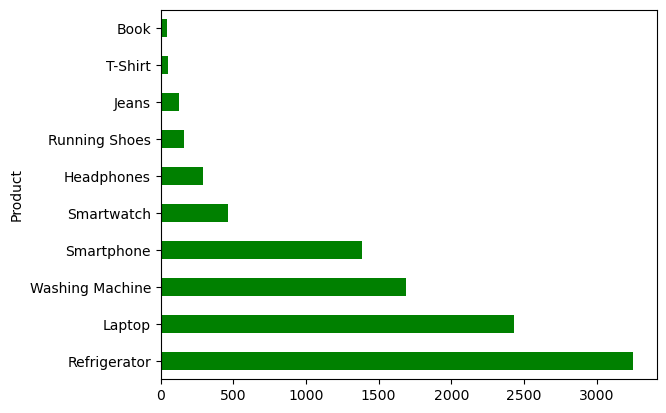

In [25]:
avg_sales.plot(kind="barh",color="green")

In [26]:
pivot_table = pd.pivot_table(
    data,
    values='Total Sales',
    index='Category',
    columns='Status',
    aggfunc="sum")
pivot_table

Status,Cancelled,Completed,Pending
Category,,,
Books,180,210,645
Clothing,1120,1400,1020
Electronics,26650,55900,47400
Footwear,1080,1620,1620
Home Appliances,36000,29400,39600


<Axes: xlabel='Status', ylabel='Category'>

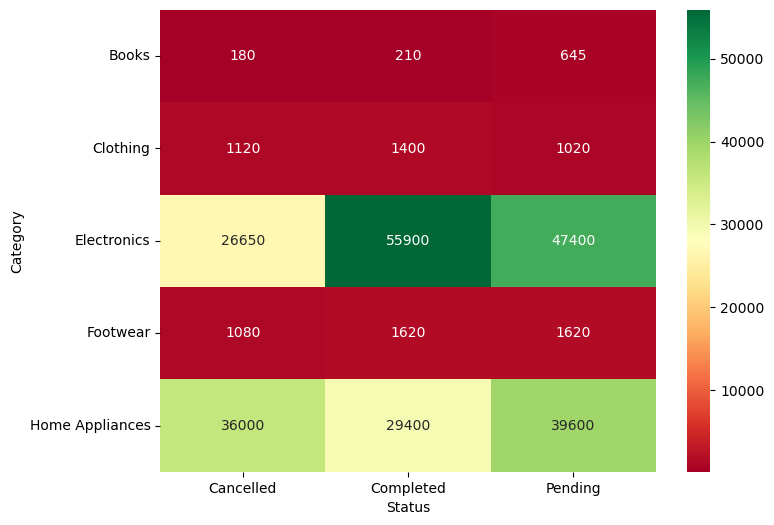

In [27]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='RdYlGn')

In [28]:
# 11. Which customer made the highest and lowest number of purchases?
purchase_counts = data['Customer Name'].value_counts()
purchase_counts

Customer Name
Emma Clark       32
Jane Smith       30
Olivia Wilson    29
John Doe         26
David Lee        26
Michael Brown    24
Daniel Harris    23
Emily Johnson    22
Chris White      22
Sophia Miller    16
Name: count, dtype: int64

In [29]:
Highest_purchase=purchase_counts.idxmax()

In [30]:
lowest_purchase=purchase_counts.idxmin()

In [31]:
# 12. What is the average order value by payment method?
Avg_ordervalue=round(data.groupby("Payment Method")["Total Sales"].mean(),1)
Avg_ordervalue

Payment Method
Amazon Pay      798.8
Credit Card    1140.6
Debit Card      601.9
Gift Card      1141.8
PayPal         1160.8
Name: Total Sales, dtype: float64

In [32]:
# 13. What are the top 10 dates with the highest number of order cancellations
cancelled_orders = data[data['Status'] == 'Cancelled']
cancelled_orders

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
9,ORD0010,2025-12-03,Smartphone,Electronics,500,1,500,Emily Johnson,San Francisco,Credit Card,Cancelled
13,ORD0014,2025-04-03,Washing Machine,Home Appliances,600,3,1800,Michael Brown,Miami,Credit Card,Cancelled
15,ORD0016,2025-02-26,Refrigerator,Home Appliances,1200,1,1200,John Doe,Boston,Credit Card,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...
244,ORD0245,2025-04-02,Laptop,Electronics,800,1,800,Michael Brown,Los Angeles,Credit Card,Cancelled
245,ORD0246,2025-03-17,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,2025-03-30,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,2025-05-03,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled


In [33]:
#14 how many orders were cancelled by date?
cancelled_orders.groupby("Date").size().head(10).sort_values(ascending=False)

Date
2025-02-16    4
2025-02-20    4
2025-02-15    2
2025-02-17    2
2025-01-04    1
2025-02-04    1
2025-02-13    1
2025-02-14    1
2025-02-19    1
2025-02-21    1
dtype: int64

In [34]:
# 15. How do quantities sold vary across different product categories?
data.groupby("Category")["Quantity"].size().sort_values(ascending=False)

Category
Electronics        118
Clothing            40
Home Appliances     40
Footwear            27
Books               25
Name: Quantity, dtype: int64

In [35]:
#16 Who are the top 5 customers by total sales?
data.groupby('Customer Name')['Total Sales'].sum().nlargest(5)  

Customer Name
Olivia Wilson    36170
Jane Smith       31185
Emma Clark       29700
John Doe         26870
Emily Johnson    23475
Name: Total Sales, dtype: int64

In [80]:
# 17.Using a bar chart to find the top ten locations by total sales.
Totalsales_location= data.groupby("Customer Location")["Total Sales"].sum().sort_values(ascending=False)
Totalsales_location

Customer Location
Miami            31700
Denver           29785
Houston          28390
Dallas           27145
Seattle          26890
Boston           26170
Chicago          20810
New York         18940
Los Angeles      17820
San Francisco    16195
Name: Total Sales, dtype: int64

<Axes: xlabel='Customer Location'>

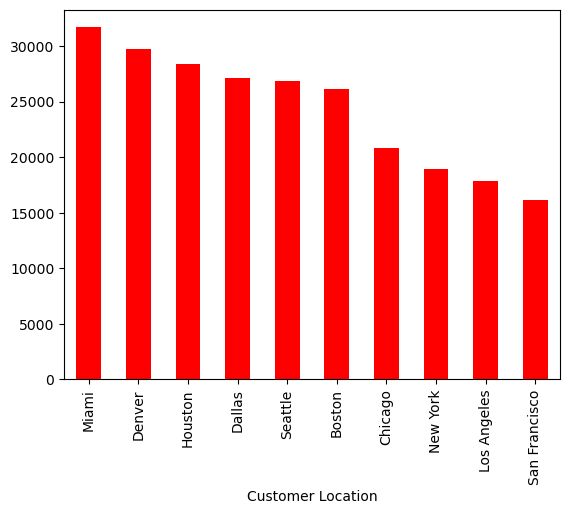

In [84]:

Totalsales_location.plot(kind="bar",color="red")